#1. Introduction
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


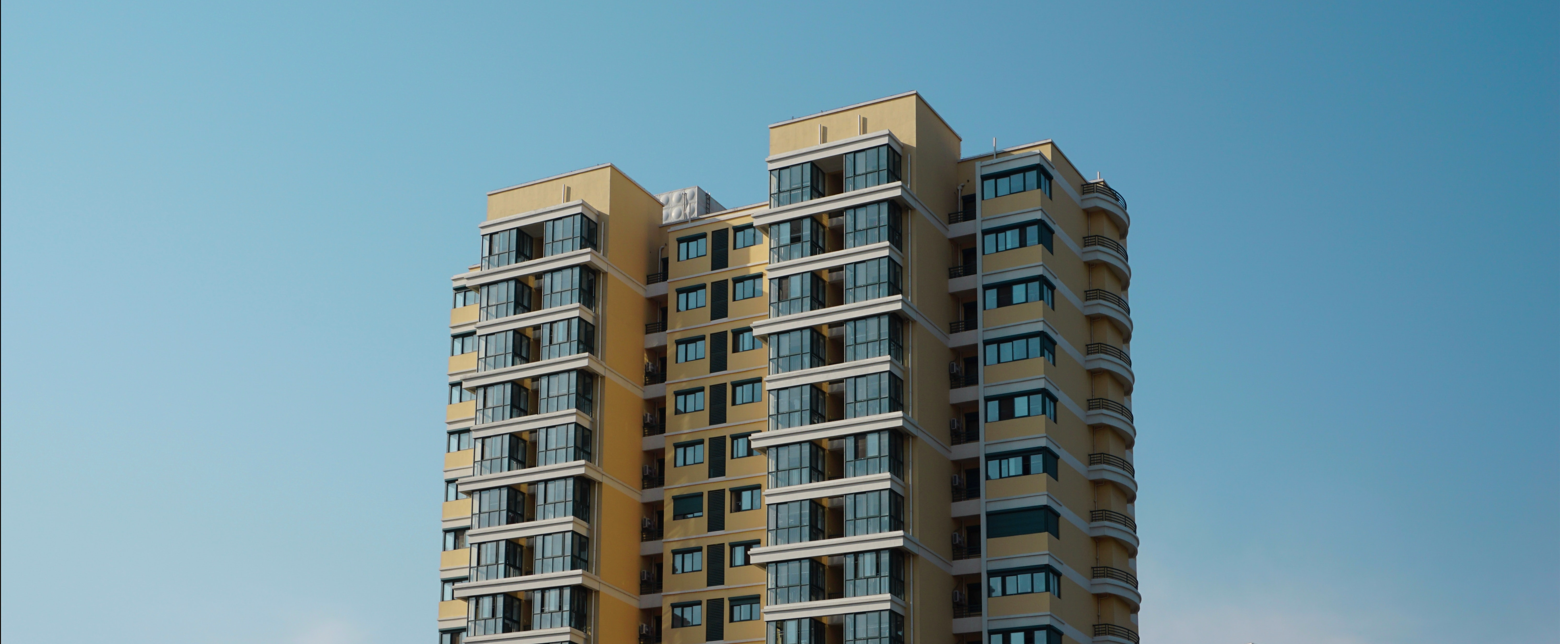

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#2. Data Loading


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is C8C4-4C9A

 Directory of C:\Users\ChiGa\Desktop\UpGrad Advance Reg Assignment

24-Oct-21  02:50 PM    <DIR>          .
24-Oct-21  02:49 PM    <DIR>          ..
24-Oct-21  02:50 PM    <DIR>          .ipynb_checkpoints
24-Oct-21  02:49 PM    <DIR>          Data
24-Oct-21  01:18 PM         1,582,992 Screenshot 2021-10-24 131809.png
24-Oct-21  02:46 PM         3,022,826 Surprise_Housing_Pricing.ipynb
               2 File(s)      4,605,818 bytes
               4 Dir(s)  152,490,733,568 bytes free


In [3]:
df = pd.read_csv(r'C:\Users\ChiGa\Desktop\UpGrad Advance Reg Assignment\Data\train.csv')

In [4]:
# Dimension of the data
df.shape

(1460, 81)

## 2.1 Data Inspection

In [5]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Summary statistics of the numeric columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.2 Null values

In [7]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.sort_values(by='% Null',ascending=False).head(10))
# Getting columns with high null values percentage
df_high_null = df_null[df_null['% Null']>25].sort_values(by='% Null')
# Columns in the above set will be dropped
cols_to_drop = df_high_null.Column.values
print('--'*15)
print(cols_to_drop )
df.drop(labels=cols_to_drop,axis=1,inplace=True)

          Column  % Null
72        PoolQC   99.52
74   MiscFeature   96.30
6          Alley   93.77
73         Fence   80.75
57   FireplaceQu   47.26
3    LotFrontage   17.74
59   GarageYrBlt    5.55
64    GarageCond    5.55
58    GarageType    5.55
60  GarageFinish    5.55
------------------------------
['FireplaceQu' 'Fence' 'Alley' 'MiscFeature' 'PoolQC']


In [8]:
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null[df_null['% Null']>0]

,index,% Null
3,LotFrontage,17.74
24,MasVnrType,0.55
25,MasVnrArea,0.55
29,BsmtQual,2.53
30,BsmtCond,2.53
31,BsmtExposure,2.60
32,BsmtFinType1,2.53
34,BsmtFinType2,2.60
41,Electrical,0.07
56,GarageType,5.55


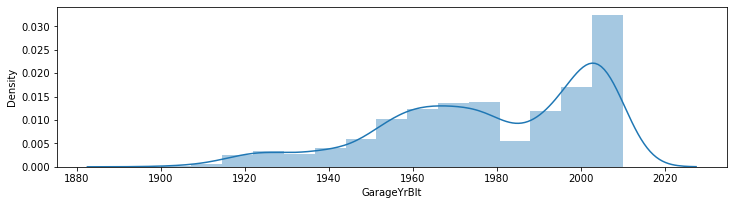

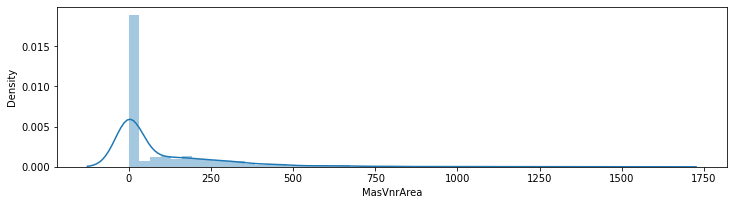

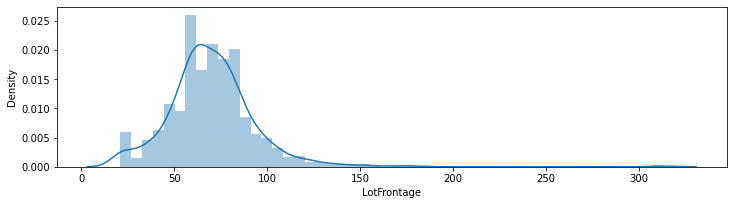

In [9]:
num_cols = ['GarageYrBlt','MasVnrArea','LotFrontage']
i=1
for col in num_cols:
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i)
  sns.distplot(df[col])
  i+=1
  plt.show()

In [10]:
df['LotFrontage'] = df['LotFrontage'].fillna(value=np.median)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=np.median)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
low_null = df_null[df_null['% Null']>0]['index'].tolist()

In [13]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(low_null)

-----------------------------
<function median at 0x00000253E0ECF5E0>    18.24
60.0                                        8.97
80.0                                        5.01
70.0                                        4.71
75.0                                        3.74
                                           ...  
111.0                                       0.07
112.0                                       0.07
46.0                                        0.07
38.0                                        0.07
140.0                                       0.07
Name: LotFrontage, Length: 108, dtype: float64
-----------------------------
-----------------------------
None       57.03
BrkFace    32.29
Stone       9.57
BrkCmn      1.12
Name: MasVnrType, dtype: float64
-----------------------------
-----------------------------
0.0      56.80
108.0     0.60
180.0     0.60
72.0      0.60
16.0      0.52
         ...  
481.0     0.07
375.0     0.07
342.0     0.07
137.0     0.07
415.0     0.0

In [14]:
# Following columns have highly imbalanced data we can drop them
cols_to_drop = ['GarageCond','GarageQual','Electrical','BsmtFinType2','BsmtCond']
df.drop(labels=cols_to_drop,axis=1,inplace=True)

In [15]:
df['GarageFinish'] = df['GarageFinish'].fillna(pd.Series(np.random.choice(['Unf', 'RFn', 'Fin'], 
                                                      p=[0.45, 0.29, 0.26], size=len(df))))
df['GarageType'] = df['GarageType'].fillna(pd.Series(np.random.choice(['Attchd', 'Detchd'], 
                                                      p=[0.69, 0.31], size=len(df))))
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='NA')
df['BsmtQual'] = df['BsmtQual'].fillna(value='NA')

##2.3 Data Standardisation

In [16]:
import pandas_profiling

In [17]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3803 sha256=f414a1dcd1e7b6b33d3e30bd264b9e751e081dfbf1df75e90e3925e4d7328c1b
  Stored in directory: c:\users\chiga\appdata\local\pip\cache\wheels\52\e4\f3\16724791571a955a46d54650510c98c04ab7d339626aee27cc
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4071 sha256=4edc6ab88a5e2838f55cb0af08f3ef2e02d42de201db2734a32b77ffd8733b7d
  Stored in directory: c:\users\chiga\appdata\local\pip\cache\wheels\73\d8\8d\92f612c03c895f19bcc56a6c54be7bb41aaa698012a5624f60
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3896 sha256=0a99d701fa2d71c8820f080005bd07c128ba8493095f1edd410ba86a28970e73
  Stored in directory: c:\users\chiga\appdata\local\pip\cache\wheels\a6\fb\f5\4adf241f384634f52028f15eab6a325e77b8766a0a00816bbf
  Created wheel for dash-colorscales

In [18]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(low_null)

-----------------------------
<function median at 0x00000253E0ECF5E0>    18.24
60.0                                        8.97
80.0                                        5.01
70.0                                        4.71
75.0                                        3.74
                                           ...  
111.0                                       0.07
112.0                                       0.07
46.0                                        0.07
38.0                                        0.07
140.0                                       0.07
Name: LotFrontage, Length: 108, dtype: float64
-----------------------------
-----------------------------
None       57.03
BrkFace    32.29
Stone       9.57
BrkCmn      1.12
Name: MasVnrType, dtype: float64
-----------------------------
-----------------------------
0.0      56.80
108.0     0.60
180.0     0.60
72.0      0.60
16.0      0.52
         ...  
481.0     0.07
375.0     0.07
342.0     0.07
137.0     0.07
415.0     0.0

KeyError: 'BsmtCond'

In [19]:
import dtale

In [20]:
dtale.show(df)

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/85 [00:00<?, ?it/s]

Exception occurred while processing request: 'float' object has no attribute 'shape'
Traceback (most recent call last):
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\views.py", line 113, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\views.py", line 2649, in get_corr_analysis
    column_name, max_score, corrs, ranks = correlations.get_analysis(data_id)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\correlations.py", line 72, in get_analysis
    corr_matrix, _ = build_matrix(data_id, df, valid_corr_cols)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\correlations.py", line 48, in build_matrix
    data = np.corrcoef(data[cols].values, rowvar=False)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\numpy\lib\function_base.py", line 2634, in corrcoef
    c = cov(x, y, rowvar, dtype=dtype)
  File "<__array_function__ internals>", line 

2021-10-24 15:00:24,790 - ERROR    - Exception occurred while processing request: 'float' object has no attribute 'shape'
Traceback (most recent call last):
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\views.py", line 113, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\views.py", line 2649, in get_corr_analysis
    column_name, max_score, corrs, ranks = correlations.get_analysis(data_id)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\correlations.py", line 72, in get_analysis
    corr_matrix, _ = build_matrix(data_id, df, valid_corr_cols)
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\dtale\correlations.py", line 48, in build_matrix
    data = np.corrcoef(data[cols].values, rowvar=False)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "C:\Users\ChiGa\anaconda3\lib\site-packages\numpy\lib\function_base.py", line 2634, in corrcoef
    c = cov(x, y, rowvar, dtype=dtype)
  File "<